<h1>Импорт библиотек

In [55]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [56]:
def sum_prod(matrix, vector):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    return sum([np.dot(matrix[i],vector[i]) for i in range(len(matrix))])

# Test
print(sum_prod([[1, 2, 3, 4], [6, 0, 7, 6], [9, 6, 7, 6], [3, 8, 55, 10]],[1, 2, 3, 4]))

[ 52  52 258  74]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [57]:
def binarize(M, threshold):
    return (M > threshold).astype(int)

# Тесты
# Создаем тестовую матрицу
matrix = np.array([[0.1, 0.5, 0.8],
                   [0.3, 0.9, 0.2],
                   [0.6, 0.4, 0.7]])

print(binarize(matrix, 0.5))

[[0 0 1]
 [0 1 0]
 [1 0 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [58]:
def unique_elements(mat):
    unique_rows = [np.unique(row) for row in mat]
    unique_cols = [np.unique(column) for column in mat.T]
    return f"Уникальные элементы столбцов \n{unique_cols} \nУникальные элементы строк\n{unique_rows}"

# Тесты
    # Создаем тестовую матрицу
matrix = np.array([[3, 3, 3, 2],
                   [4, 5, 9, 99],
                   [7, 11, 9, 7]])

print(unique_elements(matrix))


Уникальные элементы столбцов 
[array([3, 4, 7]), array([ 3,  5, 11]), array([3, 9]), array([ 2,  7, 99])] 
Уникальные элементы строк
[array([2, 3]), array([ 4,  5,  9, 99]), array([ 7,  9, 11])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[[ 1.8831507  -1.34775906 -1.270485    0.96939671]
 [-1.17312341  1.94362119 -0.41361898 -0.74745481]
 [ 1.92294203  1.48051479  1.86755896  0.90604466]
 [-0.86122569  1.91006495 -0.26800337  0.8024564 ]
 [ 0.94725197 -0.15501009  0.61407937  0.92220667]]
Мат ожидания:
 рядов - [ 0.05857584 -0.097644    1.54426511  0.39582307  0.58213198]
 колонок - [0.54379912 0.76628636 0.1059062  0.57052992]
Дисперсия:
рядов - [1.97571216 1.46137845 0.16482614 1.11977906 0.19834062]
 колонок - [1.75611793 1.70448884 1.13316559 0.43724301]


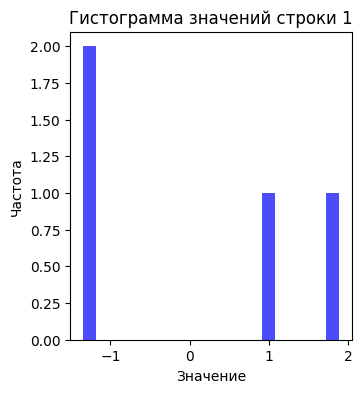

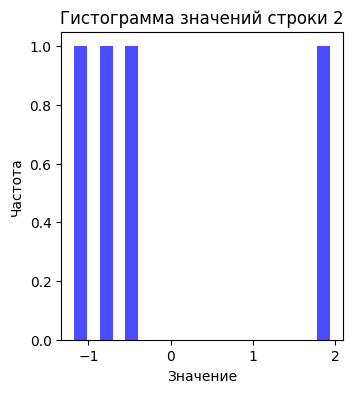

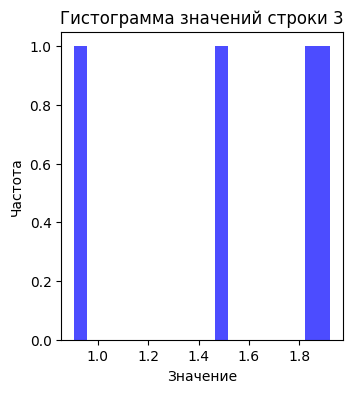

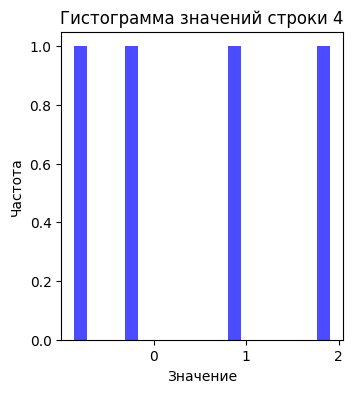

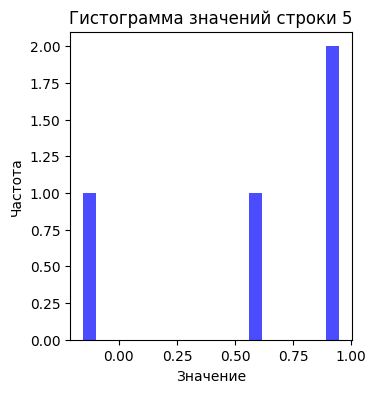

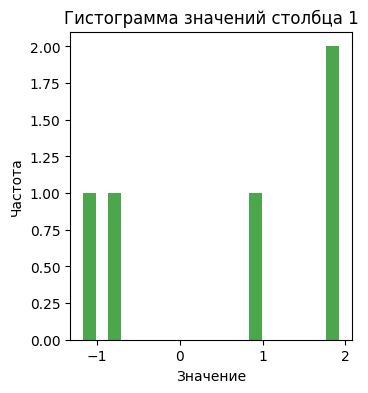

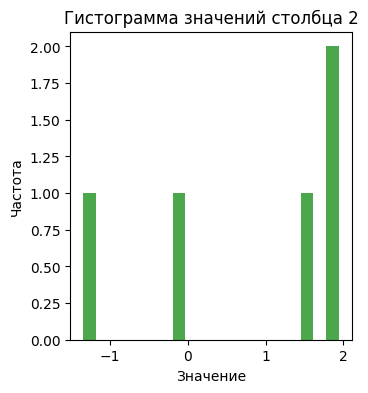

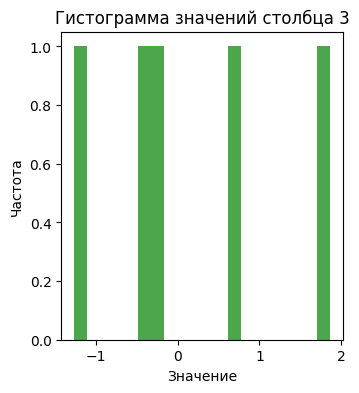

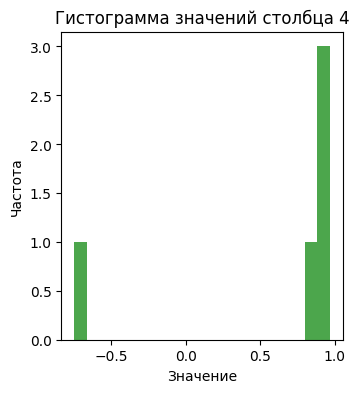

In [59]:
def generate_and_analyze_matrix(m, n):
    # Генерируем матрицу с случайными числами из нормального распределения
    matrix = np.random.randn(m, n)
    print(matrix)
    

    # Вычисляем математическое ожидание и дисперсию для каждой строки и столбца
    row_means = np.mean(matrix, axis=1)
    column_means = np.mean(matrix, axis=0)
    row_variances = np.var(matrix, axis=1)
    column_variances = np.var(matrix, axis=0)

    print(f"Мат ожидания:\n рядов - {row_means}\n колонок - {column_means}\nДисперсия:\nрядов - {row_variances}\n колонок - {column_variances}")

    # Строим гистограммы значений для каждой строки
    for i in range(m):
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.hist(matrix[i], bins=20, color='blue', alpha=0.7)
        plt.title(f"Гистограмма значений строки {i+1}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")

    # Строим гистограммы значений для каждого столбца
    for j in range(n):
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.hist(matrix[:, j], bins=20, color='green', alpha=0.7)
        plt.title(f"Гистограмма значений столбца {j+1}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")

    # Возвращаем матрицу, мат. ожидание и дисперсию для строк и столбцов
    

# Пример использования
generate_and_analyze_matrix(5,4)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [60]:
def chess(m, n, a, b):
    import numpy as np

def chess(m, n, a, b):
    matrix = np.empty((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

# Тесты
chess (3, 4, 1, 2)
chess(4, 4, 0, 1)
chess(5, 5, 9, 8)   
chess(7, 4, 15, 4)


array([[15,  4, 15,  4],
       [ 4, 15,  4, 15],
       [15,  4, 15,  4],
       [ 4, 15,  4, 15],
       [15,  4, 15,  4],
       [ 4, 15,  4, 15],
       [15,  4, 15,  4]])

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

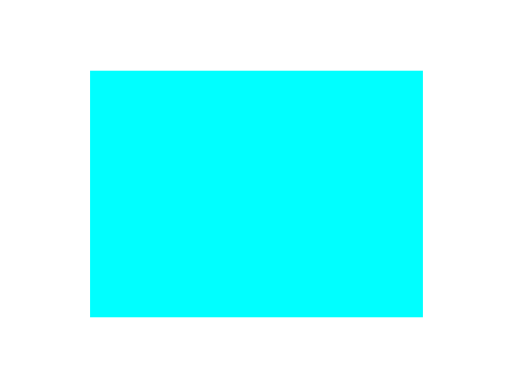

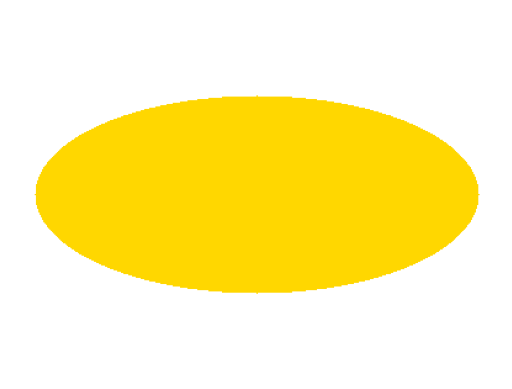

In [61]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    #Координаты углов прямоугольника
    x1, y1 = int((n - a) / 2), int((m - b) / 2)
    x2, y2 = x1 + a, y1 + b
    
    #Рисуем прямоугольник
    image[y1:y2, x1:x2] = rectangle_color
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    x0, y0 = int(n / 2), int(m / 2)
    #Координатная сетка
    y, x = np.ogrid[0:m, 0:n]
    #Уравнение Эллипса
    mask = ((x - x0) ** 2 / (a ** 2) + (y - y0) ** 2 / (b ** 2)) <= 1
    #Эллипс
    image[mask] = ellipse_color
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Тесты
draw_rectangle(270, 200, 300, 400, (0, 255, 255), (255, 255, 255))
draw_ellipse(180, 80, 300, 400, (255, 215, 0), (255, 255, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Временной ряд [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984 

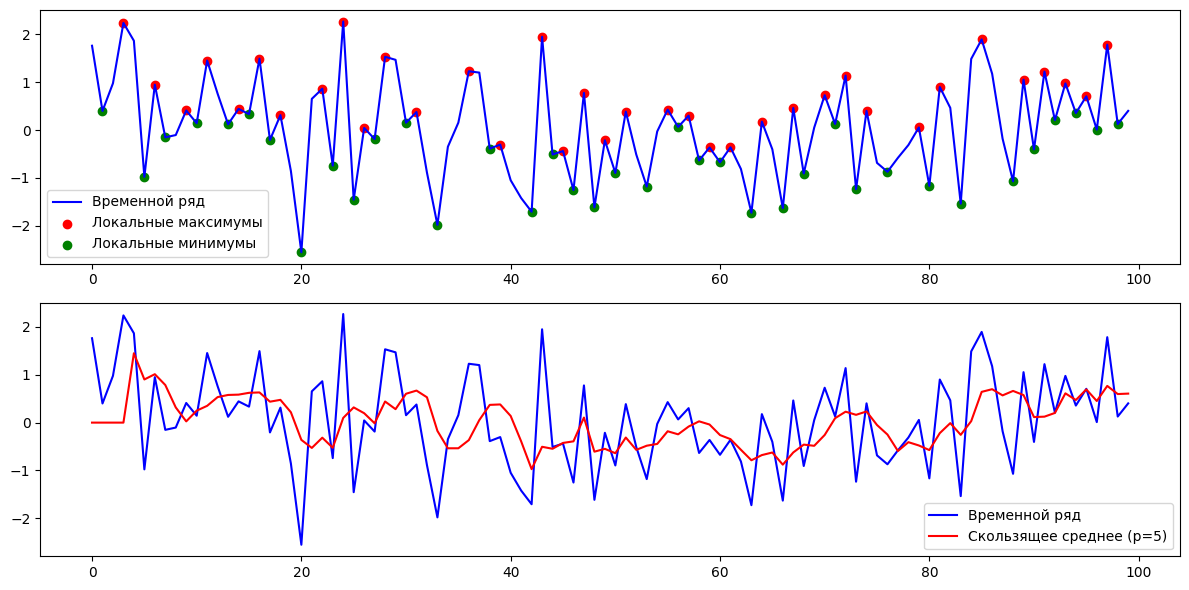

In [62]:

# Создаем случайный временной ряд для примера
np.random.seed(0)
time_series = np.random.randn(100)  # Пример временного ряда

# Вычисляем математическое ожидание и дисперсию
mean_value = np.mean(time_series)
variance = np.var(time_series)
std_deviation = np.sqrt(variance)

# Находим локальные максимумы и минимумы
local_maxima = []
local_minima = []

for i in range(1, len(time_series) - 1):
    if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
        local_maxima.append((i, time_series[i]))
    elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
        local_minima.append((i, time_series[i]))

# Вычисляем скользящее среднее с окном p
def moving_average(series, p):
    moving_avg = np.convolve(series, np.ones(p), mode='valid') / p
    return np.concatenate((np.zeros(p - 1), moving_avg), axis=0)

p = 5  # Размер окна скользящего среднего
smoothed_series = moving_average(time_series, p)

# Вывод результатов
print("Временной ряд", time_series)
print("Математическое ожидание:", mean_value)
print("Дисперсия:", variance)
print("СКО:", std_deviation)
print("Локальные максимумы:", local_maxima)
print("Локальные минимумы:", local_minima)

# Графики
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_series, label="Временной ряд", color='b')
plt.scatter(*zip(*local_maxima), color='r', label="Локальные максимумы", marker='o')
plt.scatter(*zip(*local_minima), color='g', label="Локальные минимумы", marker='o')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_series, label="Временной ряд", color='b')
plt.plot(smoothed_series, label=f"Скользящее среднее (p={p})", color='r')
plt.legend()

plt.tight_layout()
plt.show()


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [63]:
def one_hot_encoding(vector, num_classes):
    # Создаем матрицу из нулей с размерностью (количество элементов вектора, количество классов)
    encoded_matrix = np.zeros((len(vector), num_classes), dtype=int)
    
    # Проходим по каждому элементу вектора и устанавливаем соответствующий бит в 1
    for i in range(len(vector)):
        encoded_matrix[i, vector[i]] = 1
    
    return encoded_matrix
#Test
print(one_hot_encoding([0, 5, 8, 3], 9))


[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0]]
